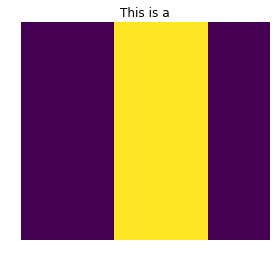

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt

def mostrar(img, caption='', subplot=None):
    if subplot == None:
        _, (subplot) = plt.subplots(1,1)
    #imgr = img.reshape((28,28))
    subplot.axis('off')
    subplot.imshow(img)#, cmap='gray')
    plt.title(caption)
img=[
    [0,0,0,255,255,255,0,0],
    [0,0,0,255,255,255,0,0],
    [0,0,0,255,255,255,0,0],
    [0,0,0,255,255,255,0,0],
    [0,0,0,255,255,255,0,0],
    [0,0,0,255,255,255,0,0],
    [0,0,0,255,255,255,0,0]
    ]
mostrar(img, 'This is a')

n00
[[[['n00'], ['n01'], ['n02'], ['n03'], ['n04'], ['n05'], ['n06'], ['n07'], ['n08'], ['n09']], [['n10'], ['n11'], ['n12'], ['n13'], ['n14'], ['n15'], ['n16'], ['n17'], ['n18'], ['n19']], [['n20'], ['n21'], ['n22'], ['n23'], ['n24'], ['n25'], ['n26'], ['n27'], ['n28'], ['n29']], [['n30'], ['n31'], ['n32'], ['n33'], ['n34'], ['n35'], ['n36'], ['n37'], ['n38'], ['n39']], [['n40'], ['n41'], ['n42'], ['n43'], ['n44'], ['n45'], ['n46'], ['n47'], ['n48'], ['n49']], [['n50'], ['n51'], ['n52'], ['n53'], ['n54'], ['n55'], ['n56'], ['n57'], ['n58'], ['n59']], [['n60'], ['n61'], ['n62'], ['n63'], ['n64'], ['n65'], ['n66'], ['n67'], ['n68'], ['n69']], [['n70'], ['n71'], ['n72'], ['n73'], ['n74'], ['n75'], ['n76'], ['n77'], ['n78'], ['n79']], [['n80'], ['n81'], ['n82'], ['n83'], ['n84'], ['n85'], ['n86'], ['n87'], ['n88'], ['n89']], [['n90'], ['n91'], ['n92'], ['n93'], ['n94'], ['n95'], ['n96'], ['n97'], ['n98'], ['n99']]]]
[[[['b00'], ['b01'], ['b02'], ['b03'], ['b04'], ['b05'], ['b06'], ['b07']

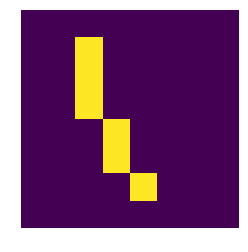

In [2]:
import random
import numpy as np
import copy


def dibuja_segmento(img,d,ini=None,fin=None):
    txt=copy.deepcopy(d[0])
    shape_x,shape_y=img.shape[0:2]
    if ini==None:
        ini=np.array([6,4])#[random.randrange(0, shape_x),random.randrange(0, shape_y)])
    if fin==None:
        fin=np.array([1,2])#[random.randrange(0, shape_x),random.randrange(0, shape_y)])
    delta=fin-ini
    maximo=max(abs(delta[0]),abs(delta[1]))
    if maximo==0:
        ini=np.array([0,0])
        fin=np.array([shape_x-1,shape_y-1])
        delta=fin
        maximo=max(abs(shape_x-1),abs(shape_y-1))
    paso=delta/maximo
    print("a",ini,fin,delta,maximo,paso)

    img[ini[0]][ini[1]]=255
    img[fin[0]][fin[1]]=255
    
    for i in range(maximo+1):
        punto1=(ini+i*paso).astype(int)
        print("puntoA",punto1,ini,paso,i,punto1==ini,(punto1==ini).all())        
        img[punto1[0],punto1[1]]=255
        txt[punto1[0]][punto1[1]].append('p'+str(punto1[0])+str(punto1[1]))
    d.append(copy.deepcopy(txt))
    txt[ini[0]][ini[1]].append('e'+str(ini[0])+str(ini[1]))
    txt[fin[0]][fin[1]].append('e'+str(fin[0])+str(fin[1]))
    d.append(copy.deepcopy(txt))
    for i in range(maximo+1):
        punto1=(ini+i*paso).astype(int)
        print("puntoB",punto1,ini,paso,i,punto1==ini,(punto1==ini).all())        
        if i<maximo/2:
            txt[punto1[0]][punto1[1]].append('i'+str(ini[0])+str(ini[1]))
            #txt[punto1[0]][punto1[1]].append(['linea2',str(fin[0]),str(fin[1])])
        else:
            txt[punto1[0]][punto1[1]].append('i'+str(fin[0])+str(fin[1]))
            #txt[punto1[0]][punto1[1]].append(['linea2',str(ini[0]),str(ini[1])])
    d.append(copy.deepcopy(txt))
    for i in range(maximo+1):
        punto1=(ini+i*paso).astype(int)
        print("puntoB",punto1,ini,paso,i,punto1==ini,(punto1==ini).all())        
        if i<maximo/2:
            #txt[punto1[0]][punto1[1]].append(['linea1',str(ini[0]),str(ini[1])])
            txt[punto1[0]][punto1[1]].append('f'+str(fin[0])+str(fin[1]))
        else:
            #txt[punto1[0]][punto1[1]].append(['linea1',str(fin[0]),str(fin[1])])
            txt[punto1[0]][punto1[1]].append('f'+str(ini[0])+str(ini[1]))
    d.append(txt)
        
        
     
    return img

img=np.zeros((8,8))#np.array([[0]*8]*8)
d=[[[['n'+str(j)+str(i)] for i in range(10)] for j in range(10)]]
print(d[0][0][0][0])
print(d)
for i in range(10):
        d[0][i][0][0]='b'+str(i)+str(0)
        d[0][i][9][0]='b'+str(i)+str(9)
        d[0][0][i][0]='b'+str(0)+str(i)
        d[0][9][i][0]='b'+str(9)+str(i)
print(d)
print(len(d),len(d[0]),len(d[0][0]),len(d[0][0][0]))
dibuja_segmento(img,d)
print('txt')
for tx in d:
    print('tiempo')
    for t in tx:
        print(t)
mostrar(img)

In [3]:
reglas=[{}]
x=0
def indices():
                ind=[]
                global reglas,d,x,i,j,k
                ind=[]
                for j1 in range(-1,1):
                    for k1 in range(-1,1):
                        if  d[i][j1+j][k1+k][-1][1:3]==d[i+1][j][k][-1][1:3]:
                            ind.append([j1,k1])
                return ind


for i in range(1,len(d)-1):
    reglas.append({})
    for j in range(len(d[0])):
        for k in range(len(d[0][0])):
            if d[i][j][k][-1]!=d[i+1][j][k][-1]:
                x=(d[i][j-1][k-1][-1][0],
                   d[i][j][k-1][-1][0],
                   d[i][j+1][k-1][-1][0],
                   d[i][j-1][k][-1][0],
                   d[i][j][k][-1][0],
                   d[i][j+1][k][-1][0],
                   d[i][j-1][k+1][-1][0],
                   d[i][j][k+1][-1][0],
                   d[i][j+1][k+1][-1][0]
                  )
                y=d[i+1][j][k][-1][0]
                if x in reglas[i]:
                    if (reglas[i][x]==y):
                        print('Ya existe',str(x),str(y))
                    else:
                        print('en',str(x),'se contradice',str(y),'con',str(reglas[i][x]))
                else:
                    print('Se adiciona',x,y)
                    reglas[i][x]=(y,indices())

print('reglas')
reglas                    
        

Se adiciona ('b', 'n', 'n', 'b', 'p', 'p', 'b', 'n', 'n') e
Se adiciona ('p', 'n', 'n', 'n', 'p', 'n', 'n', 'n', 'n') e
Se adiciona ('b', 'n', 'n', 'b', 'e', 'p', 'b', 'n', 'n') i
Se adiciona ('n', 'n', 'n', 'e', 'p', 'p', 'n', 'n', 'n') i
Se adiciona ('n', 'n', 'n', 'p', 'p', 'n', 'n', 'n', 'p') i
Se adiciona ('p', 'n', 'n', 'n', 'p', 'p', 'n', 'n', 'n') i
Se adiciona ('n', 'n', 'n', 'p', 'p', 'n', 'n', 'n', 'e') i
Se adiciona ('p', 'n', 'n', 'n', 'e', 'n', 'n', 'n', 'n') i
Se adiciona ('b', 'n', 'n', 'b', 'i', 'i', 'b', 'n', 'n') f
Se adiciona ('n', 'n', 'n', 'i', 'i', 'i', 'n', 'n', 'n') f
Se adiciona ('n', 'n', 'n', 'i', 'i', 'n', 'n', 'n', 'i') f
Se adiciona ('i', 'n', 'n', 'n', 'i', 'i', 'n', 'n', 'n') f
en ('n', 'n', 'n', 'i', 'i', 'n', 'n', 'n', 'i') se contradice f con ('f', [])
Se adiciona ('i', 'n', 'n', 'n', 'i', 'n', 'n', 'n', 'n') f
reglas


[{},
 {('b', 'n', 'n', 'b', 'p', 'p', 'b', 'n', 'n'): ('e', [[0, 0]]),
  ('p', 'n', 'n', 'n', 'p', 'n', 'n', 'n', 'n'): ('e', [[0, 0]])},
 {('b', 'n', 'n', 'b', 'e', 'p', 'b', 'n', 'n'): ('i', [[0, 0]]),
  ('n', 'n', 'n', 'e', 'p', 'p', 'n', 'n', 'n'): ('i', [[-1, 0]]),
  ('n', 'n', 'n', 'p', 'p', 'n', 'n', 'n', 'p'): ('i', []),
  ('p', 'n', 'n', 'n', 'p', 'p', 'n', 'n', 'n'): ('i', []),
  ('n', 'n', 'n', 'p', 'p', 'n', 'n', 'n', 'e'): ('i', []),
  ('p', 'n', 'n', 'n', 'e', 'n', 'n', 'n', 'n'): ('i', [[0, 0]])},
 {('b', 'n', 'n', 'b', 'i', 'i', 'b', 'n', 'n'): ('f', []),
  ('n', 'n', 'n', 'i', 'i', 'i', 'n', 'n', 'n'): ('f', []),
  ('n', 'n', 'n', 'i', 'i', 'n', 'n', 'n', 'i'): ('f', []),
  ('i', 'n', 'n', 'n', 'i', 'i', 'n', 'n', 'n'): ('f', [[-1, -1]]),
  ('i', 'n', 'n', 'n', 'i', 'n', 'n', 'n', 'n'): ('f', [])}]